In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import matplotlib.pyplot as plt
import cv2
import os
import shutil
from tqdm import tqdm
from IPython.display import clear_output

import time
import pandas as pd
import numpy as np
import math
from glob import glob

In [13]:
pip install scikit-plot

In [14]:
!pip install tensorflow

In [15]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=f32c6173be9f926cfd5f2214ee2f0b1ee64aa51da5d431aababb70cb012ceb06
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [16]:
import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical

import plotly.express as px

from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
glob('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/*')

['/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/Anger',
 '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/Neutral',
 '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/Disgust',
 '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/Sadness',
 '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/Surprise',
 '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/Fear',
 '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/Happiness']

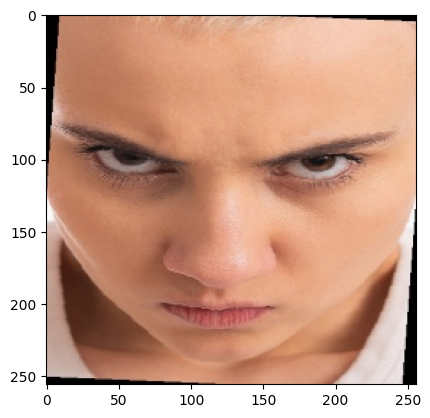

In [ ]:
img = cv2.imread('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/train_crop_align/81577566.jpg')
plt.imshow(img[:,:,::-1])

In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/labels_train.csv')
train_labels['bbox'] = train_labels['bbox'].str.strip('[')
train_labels['bbox'] = train_labels['bbox'].str.strip(']')
train_labels[['x','y','w','h']] = train_labels['bbox'].str.split(',', expand=True).astype(float).astype(int)

In [ ]:
file_names = train_labels['file_name'].value_counts()
single_label = train_labels[train_labels['file_name'].isin(file_names[file_names == 1].index)]

In [ ]:
emotion_to_num = {'Anger': 0, 'Fear': 1, 'Happiness': 2, 'Sadness': 3, 'Surprise': 4, 'Neutral': 5,'Disgust':6}
single_label.iloc[:,8] = single_label.iloc[:,8].map({'Anger': 0, 'Fear': 1, 'Happiness': 2, 'Sadness': 3, 'Surprise': 4, 'Neutral': 5,'Disgust':6})

In [ ]:
single_label.emotion.value_counts()

2    7229
5    3729
3     296
0     237
4     237
6     102
1      81
Name: emotion, dtype: int64

In [ ]:
base_dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/'
print("Contents of base directory:")
sub_folders = os.listdir(base_dir)
sub_folders

Contents of base directory:


['Anger', 'Neutral', 'Disgust', 'Sadness', 'Surprise', 'Fear', 'Happiness']

In [ ]:
from tqdm import tqdm
from IPython.display import clear_output
import time

single_label = pd.read_csv('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/single_label.csv')

train_crop_dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/train_crop_align/'
emotion_data_dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/All_emotion_data/Train/'

for i in tqdm(range(len(single_label)-1)):
  try:
    if single_label.iloc[11910-i,8] == 'Anger':
      shutil.copy(train_crop_dir + f'{single_label.iloc[11910-i,0]}',
                  emotion_data_dir + f"Anger/{single_label.iloc[11910-i,0]}")
    elif single_label.iloc[11910-i,8] == 'Fear':
      shutil.copy(train_crop_dir + f'{single_label.iloc[11910-i,0]}',
                  emotion_data_dir + f"Fear/{single_label.iloc[11910-i,0]}")
    elif single_label.iloc[11910-i,8] == 'Happiness':
      shutil.copy(train_crop_dir + f'{single_label.iloc[11910-i,0]}',
                  emotion_data_dir + f"Happiness/{single_label.iloc[11910-i,0]}")
    elif single_label.iloc[11910-i,8] == 'Sadness':
      shutil.copy(train_crop_dir + f'{single_label.iloc[11910-i,0]}',
                  emotion_data_dir + f"Sadness/{single_label.iloc[11910-i,0]}")
    elif single_label.iloc[11910-i,8] == 'Surprise':
      shutil.copy(train_crop_dir + f'{single_label.iloc[11910-i,0]}',
                  emotion_data_dir + f"Surprise/{single_label.iloc[11910-i,0]}")
    elif single_label.iloc[11910-i,8] == 'Neutral':
      shutil.copy(train_crop_dir + f'{single_label.iloc[11910-i,0]}',
                  emotion_data_dir + f"Neutral/{single_label.iloc[11910-i,0]}")
    else:
      shutil.copy(train_crop_dir + f'{single_label.iloc[11910-i,0]}',
                  emotion_data_dir + f"Disgust/{single_label.iloc[11910-i,0]}")
  except:
    continue

100%|██████████| 11910/11910 [1:30:31<00:00,  2.19it/s]


In [ ]:
all_dir = glob('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/All_emotion_data/Train/Happiness/*')
len(all_dir)

7237

In [ ]:
single_label.emotion.value_counts()

Happiness    7229
Neutral      3729
Sadness       296
Anger         237
Surprise      237
Disgust       102
Fear           81
Name: emotion, dtype: int64

In [ ]:
single_label = pd.read_csv('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/single_label.csv')

len(single_label)-1

11910

In [ ]:
i=9
single_label.iloc[i,8]

'Neutral'

In [ ]:
# Reading folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index


  # # Define labels basis use case. We are using positive:0, negative:1, neutral:2
  # # for our use case of predicting emotions of visitors entering a retail store
  # if  label in [4, 6]:    # label in ['happy', 'surprise']
  #   new_label=0           # changed to label = positive emotion
  # elif label in [0,5]:      # label in ['anger','sadness']
  #   new_label=1           # changed to label = negative emotion
  # else:                   # label in ['contempt', 'disgust', 'fear']
  #   new_label=2           # changed to label = neutral emotion


  # path = dataset_folder+'/'+sub_folder
  # sub_folder_images= os.listdir(path)

  # # reading images in the sub folder, one at a time
  # for image in sub_folder_images:
  #   image_path = path+'/'+image
  #   print(image_path+"\t"+str(new_label))

  #   image = cv2.imread(image_path)
  #   image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #   image= cv2.resize(image,(48,48))
  #   images.append(image)
  #   labels.append(new_label)
  #   i+=1
  # last.append(i)

In [ ]:
input = Input(shape = (48,48,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(7,activation="sigmoid")(drop_1)

# DenseNet169

In [ ]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
train_dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/external_data/train/'
img_size = 48
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2
                                        )
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )

Found 16064 images belonging to 7 classes.


In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
epochs = 40
batch_size = 64

In [ ]:
model.summary()

**Train**

In [ ]:
history = model.fit(x = train_generator,epochs = epochs)

Epoch 1/30
251/251 [==============================] - 5432s 22s/step - loss: 5.7583 - accuracy: 0.3727
Epoch 2/30
251/251 [==============================] - 49s 193ms/step - loss: 2.0838 - accuracy: 0.5197
Epoch 3/30
251/251 [==============================] - 48s 192ms/step - loss: 1.7876 - accuracy: 0.5932
Epoch 4/30
251/251 [==============================] - 49s 194ms/step - loss: 1.6859 - accuracy: 0.6240
Epoch 5/30
251/251 [==============================] - 48s 192ms/step - loss: 1.5039 - accuracy: 0.6469
Epoch 6/30
251/251 [==============================] - 49s 195ms/step - loss: 1.4919 - accuracy: 0.6498
Epoch 7/30
251/251 [==============================] - 48s 192ms/step - loss: 1.4752 - accuracy: 0.6577
Epoch 8/30
251/251 [==============================] - 48s 190ms/step - loss: 1.4858 - accuracy: 0.6675
Epoch 9/30
251/251 [==============================] - 49s 194ms/step - loss: 1.4775 - accuracy: 0.6703
Epoch 10/30
251/251 [==============================] - 49s 196ms/step - l

In [ ]:
earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         patience=EARLY_STOPPING_CRITERIA,
                                                         verbose= 1 ,
                                                         restore_best_weights=True
                                                        )

history = model.fit(x = train_generator,
                    epochs = EPOCHS ,
                    callbacks= [earlyStoppingCallback])

history = pd.DataFrame(history.history)

Epoch 1/30
 68/170 [===========>..................] - ETA: 42:57 - loss: 2.4947 - accuracy: 0.6011

KeyboardInterrupt: 

**FINE TUNING**

In [ ]:
model.layers[1].trainable = True

model.compile(optimizer=tf.keras.optimizers.SGD(0.001), #lower learning rate
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

history_ = model.fit(x = train_generator,epochs = FINE_TUNING_EPOCHS ,validation_data = validation_generator)
history = history.append(pd.DataFrame(history_.history) , ignore_index=True)

# VGG19

Import

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

Train

In [ ]:
train_dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/external_data/train/'
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 11983 images belonging to 7 classes.


In [ ]:
dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/external_data/train/Anger/*'
len(dir)

99

In [ ]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(7,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 7)                 57351     
                                                                 
Total params: 20081735 (76.61 MB)
Trainable params: 57351 (224.03 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32
                              )

<ipython-input-145-77174c124b2c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


9/9 [==============================] - 89s 9s/step - loss: 1.3305 - accuracy: 0.4028


In [19]:
emotion_dict = {'Anger': 0, 'Disgust': 1, 'Fear': 2, 'Happiness': 3, 'Neutral': 4, 'Sadness': 5, 'Surprise': 6}

translate_emotion = {0:'Anger', 1:'Disgust', 2: 'Fear',3: 'Happiness', 4:'Neutral',5: 'Sadness', 6:'Surprise'}


1/1 [==============================] - 0s 47ms/step


(array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32), 'Happiness')

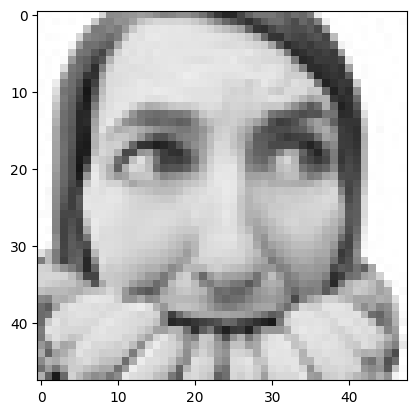

In [30]:
all_dir = glob('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/All_emotion_data/Train/Fear/*.jpg')
dir = np.random.choice(all_dir)

sample_img = cv2.imread(dir)
sample_img = cv2.resize(sample_img,(48,48))
plt.imshow(sample_img[:,:,::-1])
sample_img = np.reshape(sample_img,[1,48,48,3])
sample_img = sample_img/255.0


result = model.predict(sample_img)
result,translate_emotion[result.argmax()]


# Merge Data

In [ ]:
# prompt: copy folderusing shutil

shutil.copytree('path/to/source', 'path/to/destination')


In [ ]:
from tqdm import tqdm
from IPython.display import clear_output
import time

train_crop_dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/train_crop_align/'
emotion_data_dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/All_emotion_data/Train/'

for i in tqdm(range(len(single_label)-1)):
 # try:
    if single_label.iloc[i,8] == 'Anger':
      shutil.copy(train_crop_dir + f'{single_label.iloc[i,0]}',
                  emotion_data_dir + f"Anger/{single_label.iloc[i,0]}")
    elif single_label.iloc[i,8] == 'Fear':
      shutil.copy(train_crop_dir + f'{single_label.iloc[i,0]}',
                  emotion_data_dir + f"Fear/{single_label.iloc[i,0]}")
    elif single_label.iloc[i,8] == 'Happiness':
      shutil.copy(train_crop_dir + f'{single_label.iloc[i,0]}',
                  emotion_data_dir + f"Happiness/{single_label.iloc[i,0]}")
    elif single_label.iloc[i,8] == 'Sadness':
      shutil.copy(train_crop_dir + f'{single_label.iloc[i,0]}',
                  emotion_data_dir + f"Sadness/{single_label.iloc[i,0]}")
    elif single_label.iloc[i,8] == 'Surprise':
      shutil.copy(train_crop_dir + f'{single_label.iloc[i,0]}',
                  emotion_data_dir + f"Surprise/{single_label.iloc[i,0]}")
    elif single_label.iloc[i,8] == 'Neutral':
      shutil.copy(train_crop_dir + f'{single_label.iloc[i,0]}',
                  emotion_data_dir + f"Neutral/{single_label.iloc[i,0]}")
    else:
      shutil.copy(train_crop_dir + f'{single_label.iloc[i,0]}',
                  emotion_data_dir + f"Disgust/{single_label.iloc[i,0]}")
  # except:
  #   continue

  0%|          | 0/11910 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/All_emotion_data/Train/Neutral/100013282.jpg'

In [10]:
emotion_data_dir = glob('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/emotion_data/All_emotion_data/Train/Surprise/*')
len(emotion_data_dir)

237

In [17]:
model = tf.keras.models.load_model('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/emotion_model/emotion_model.h5')
